In [1]:
# Imports for EDA section

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv('mental_health_dataset.csv')

# Inspect the first few rows
print(data.head())


   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [2]:
# General data cleaning

# 1. Check for missing values
print("Missing Values:\n", data.isnull().sum())

# 2. Fill missing values in 'statement' column with empty strings
data['statement'] = data['statement'].fillna("").astype(str)

# 3. Remove duplicate rows, if any
data = data.drop_duplicates()

# 4. Remove leading/trailing whitespace in the 'statement' column
data['statement'] = data['statement'].str.strip()

# 5. Verify data types
print("\nData Types:\n", data.dtypes)

# 6. Check for invalid or unexpected values in the 'status' column
print("\nUnique Categories in 'status':\n", data['status'].unique())


Missing Values:
 Unnamed: 0      0
statement     362
status          0
dtype: int64

Data Types:
 Unnamed: 0     int64
statement     object
status        object
dtype: object

Unique Categories in 'status':
 ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


In [3]:
# Frequency Table for Categorical Variables
print("\nFrequency of Mental Health Status Categories:")
print(data['status'].value_counts())



Frequency of Mental Health Status Categories:
status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_71603/36650180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='status', order=data['status'].value_counts().index, palette='viridis')


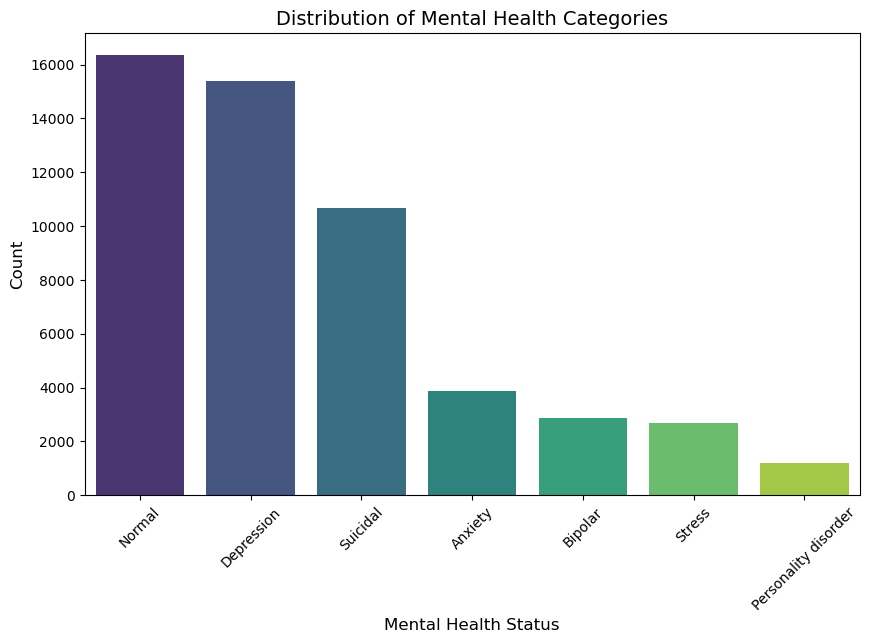

In [4]:
# Plot Frequency Distribution of Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='status', order=data['status'].value_counts().index, palette='viridis')
plt.title('Distribution of Mental Health Categories', fontsize=14)
plt.xlabel('Mental Health Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


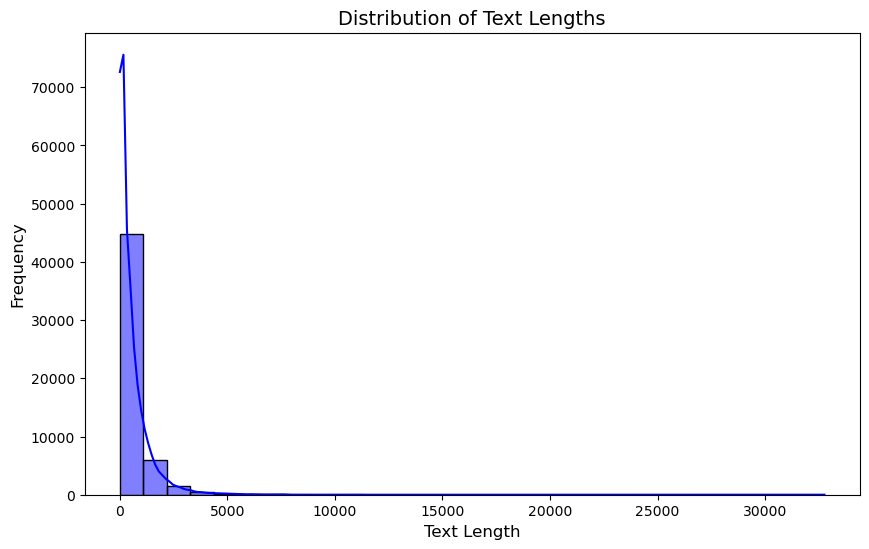

In [5]:
# Calculate the length of each text in the 'statement' column
data['text_length'] = data['statement'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='blue', alpha=0.5)
plt.title('Distribution of Text Lengths', fontsize=14)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [6]:
# Most Common Words per Category
def common_words(category, data):
    text = " ".join(data[data['status'] == category]['statement'])
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    counter = Counter(tokens)
    print(f"\nMost Common Words in {category}:")
    print(counter.most_common(10))

common_words("Depression", data)
common_words("Anxiety", data)


# Text Vectorization (TF-IDF)
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(data['statement'])
print("\nTF-IDF Matrix Shape:", tfidf_matrix.shape)



Most Common Words in Depression:
[('like', 17274), ('feel', 16151), ('want', 11854), ('know', 10229), ('get', 9845), ('even', 8577), ('life', 7977), ('would', 7286), ('cannot', 6991), ('really', 6932)]

Most Common Words in Anxiety:
[('like', 3037), ("I'm", 2980), ('anxiety', 2530), ('I’m', 2247), ('feel', 2229), ('get', 1946), ('know', 1710), ('really', 1539), ("I've", 1371), ('time', 1170)]

TF-IDF Matrix Shape: (53043, 500)


/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_71603/1466194192.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette='coolwarm')


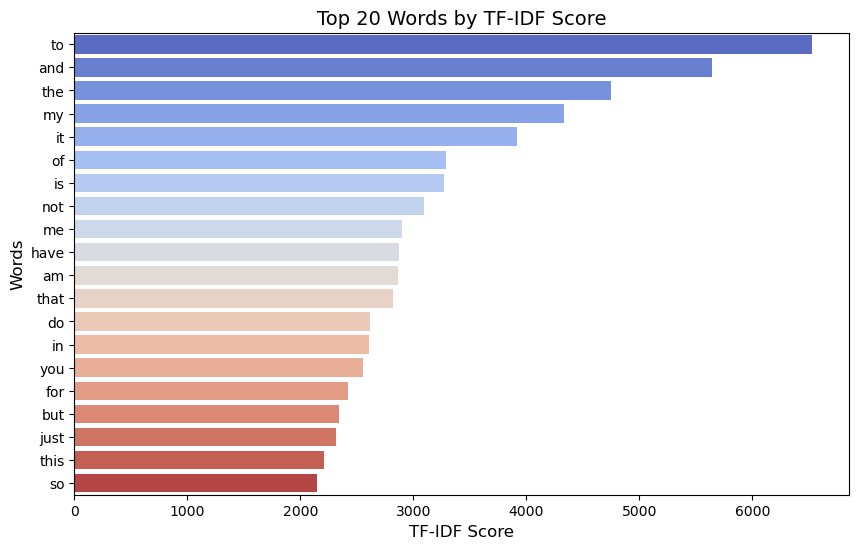

In [7]:
# Heatmap of TF-IDF Features (Top Words)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
top_words = tfidf_df.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='coolwarm')
plt.title('Top 20 Words by TF-IDF Score', fontsize=14)
plt.xlabel('TF-IDF Score', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()


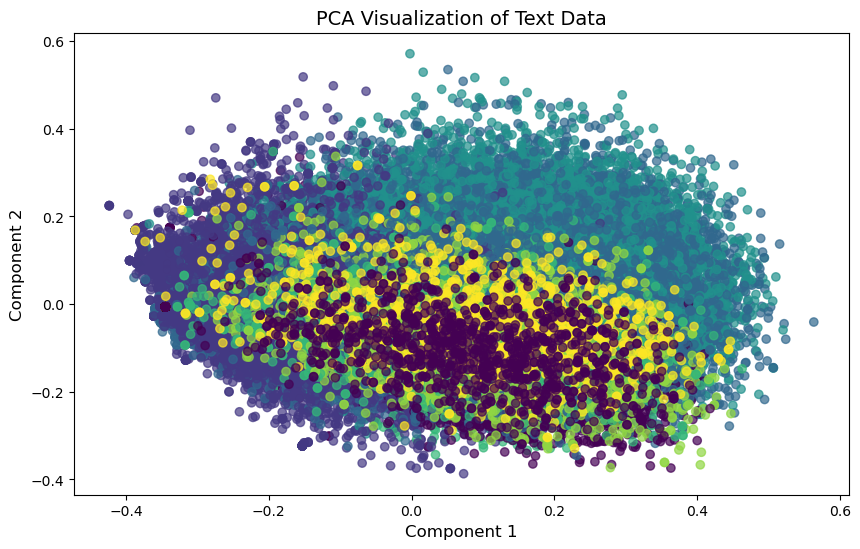

In [8]:
# Dimensionality Reduction with PCA into 2 compnents
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=data['status'].factorize()[0], cmap='viridis', alpha=0.7)
plt.title('PCA Visualization of Text Data', fontsize=14)
plt.xlabel('Component 1', fontsize=12)
plt.ylabel('Component 2', fontsize=12)
plt.show()


                                           statement  polarity
0                                         oh my gosh    0.0000
1  trouble sleeping, confused mind, restless hear...   -0.3000
2  All wrong, back off dear, forward doubt. Stay ...   -0.2500
3  I've shifted my focus to something else but I'...    0.0000
4  I'm restless and restless, it's been a month n...   -0.3125


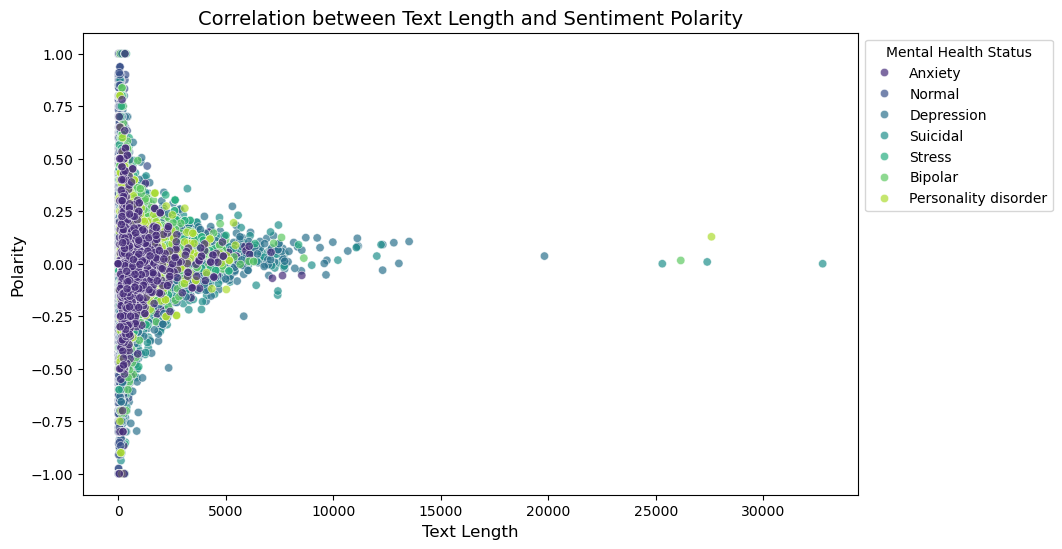

In [9]:
# Ensure the 'statement' column is filled and of the correct type
data['statement'] = data['statement'].fillna("").astype(str)

# Create a 'polarity' column using TextBlob
data['polarity'] = data['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check the first few rows to verify the column is created
print(data[['statement', 'polarity']].head())

# Plot correlation between text length and sentiment polarity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='polarity', data=data, hue='status', palette='viridis', alpha=0.7)
plt.title('Correlation between Text Length and Sentiment Polarity', fontsize=14)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
plt.legend(title='Mental Health Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


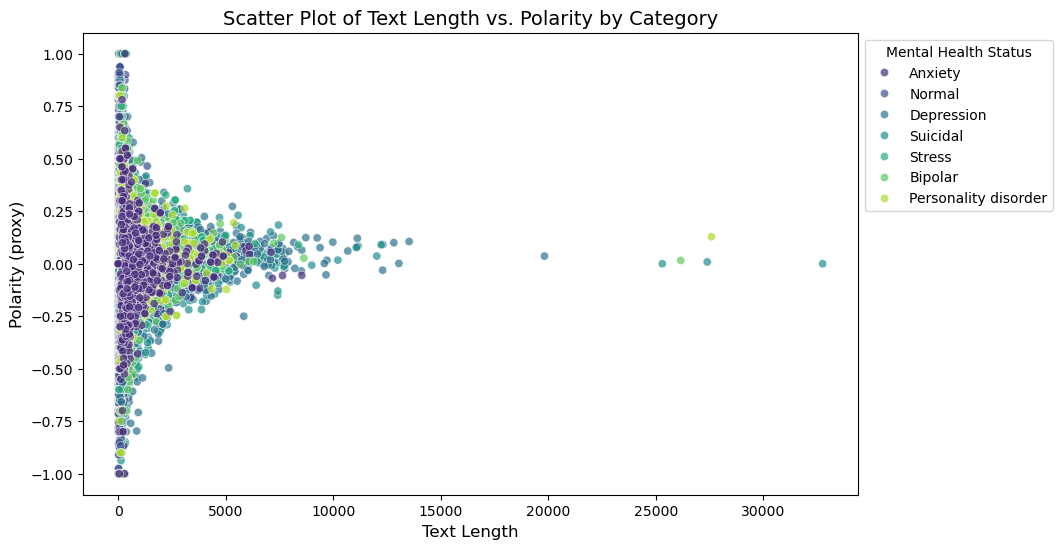

In [10]:
# Scatter Plot of Text Length vs. Polarity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='text_length', y='polarity', hue='status', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Text Length vs. Polarity by Category', fontsize=14)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Polarity (proxy)', fontsize=12)
plt.legend(title='Mental Health Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_71603/1191211429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='status', y='text_length', palette='coolwarm')


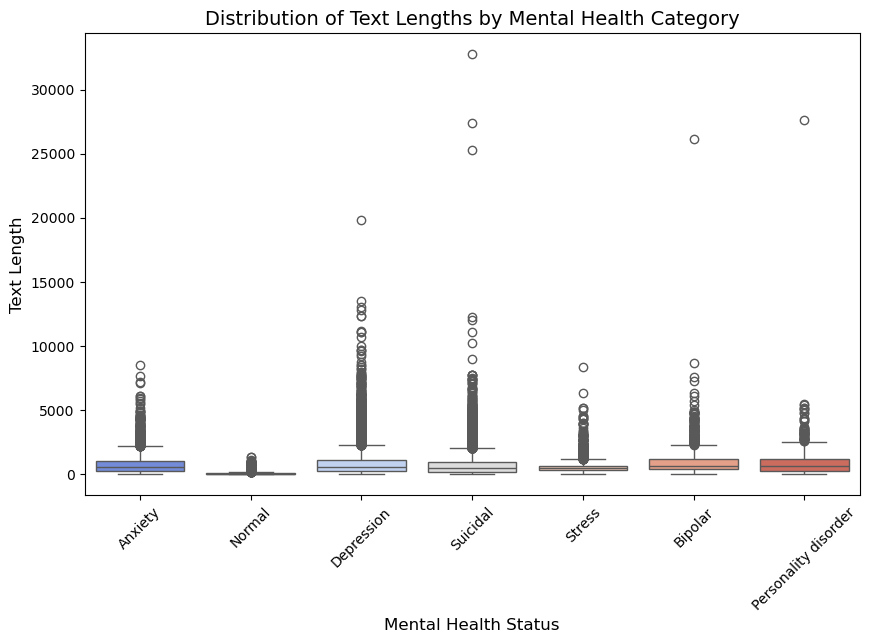

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_71603/1191211429.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='status', y='text_length', palette='muted')


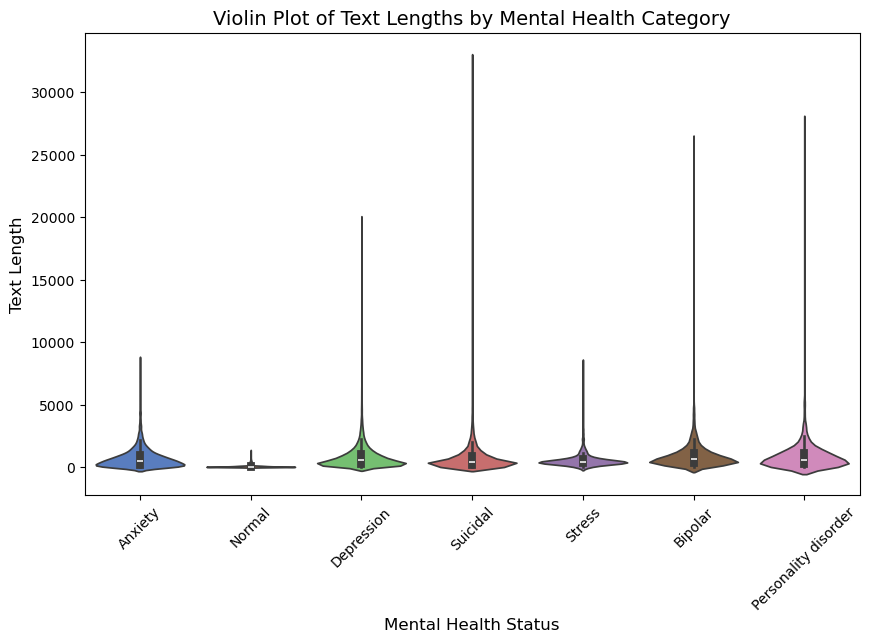

In [11]:
# Box Plots for Text Lengths by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='status', y='text_length', palette='coolwarm')
plt.title('Distribution of Text Lengths by Mental Health Category', fontsize=14)
plt.xlabel('Mental Health Status', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Violin Plot for Text Lengths by category
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='status', y='text_length', palette='muted')
plt.title('Violin Plot of Text Lengths by Mental Health Category', fontsize=14)
plt.xlabel('Mental Health Status', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [12]:
# Polarity summary
print("\nPolarity Summary Statistics by Mental Health Status:")
print(data.groupby('status')['polarity'].describe())


Polarity Summary Statistics by Mental Health Status:
                        count      mean       std  min       25%       50%  \
status                                                                       
Anxiety                3888.0 -0.012049  0.186070 -1.0 -0.088889  0.000000   
Bipolar                2877.0  0.034890  0.158734 -0.8 -0.043500  0.031905   
Depression            15404.0 -0.005096  0.196816 -1.0 -0.100000  0.000000   
Normal                16351.0  0.056993  0.294728 -1.0  0.000000  0.000000   
Personality disorder   1201.0  0.026514  0.161343 -1.0 -0.038909  0.001272   
Stress                 2669.0  0.013301  0.184992 -1.0 -0.083333  0.000000   
Suicidal              10653.0 -0.038074  0.219240 -1.0 -0.140000 -0.013864   

                           75%  max  
status                               
Anxiety               0.073340  1.0  
Bipolar               0.118667  1.0  
Depression            0.094834  1.0  
Normal                0.189981  1.0  
Personality dis

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_71603/2568402624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='status', y='polarity', palette='coolwarm')


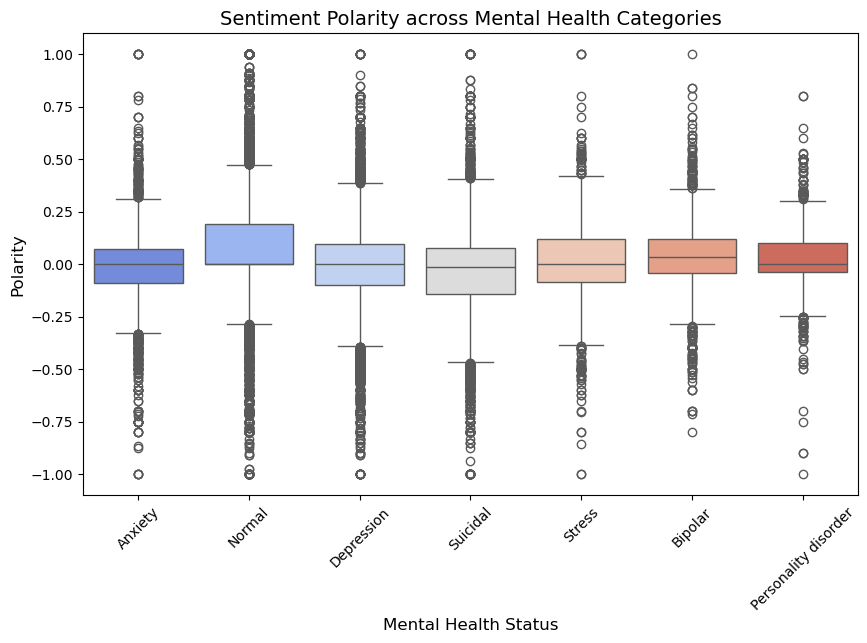

In [13]:
# Boxplot of Polarity across Categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='status', y='polarity', palette='coolwarm')
plt.title('Sentiment Polarity across Mental Health Categories', fontsize=14)
plt.xlabel('Mental Health Status', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_71603/1573606924.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='status', y='polarity', palette='coolwarm')


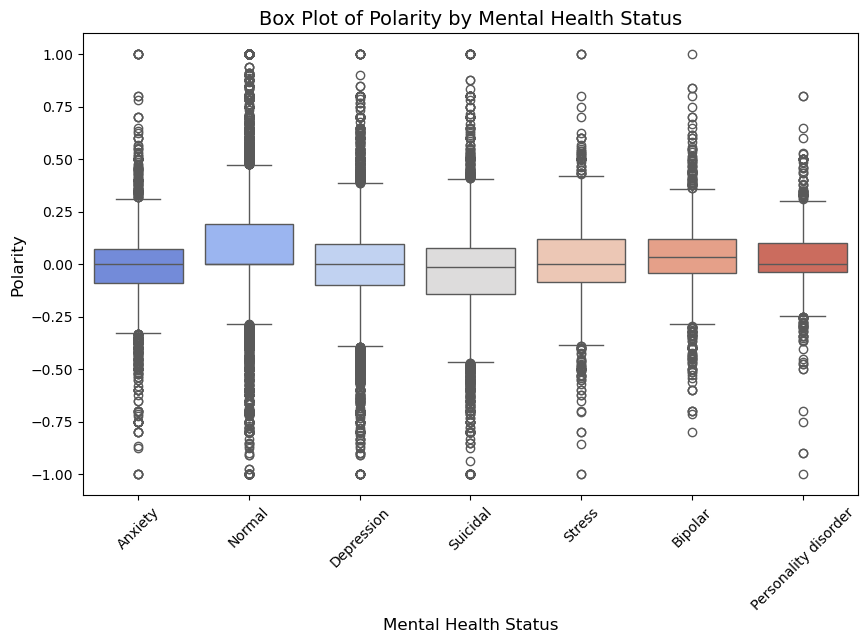

In [14]:
# Box Plot and Summary Statistics for Polarity
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='status', y='polarity', palette='coolwarm')
plt.title('Box Plot of Polarity by Mental Health Status', fontsize=14)
plt.xlabel('Mental Health Status', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
plt.xticks(rotation=45)
plt.show()


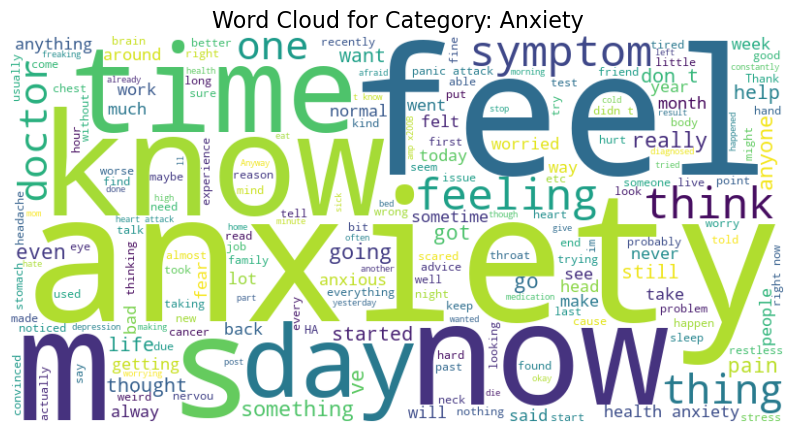

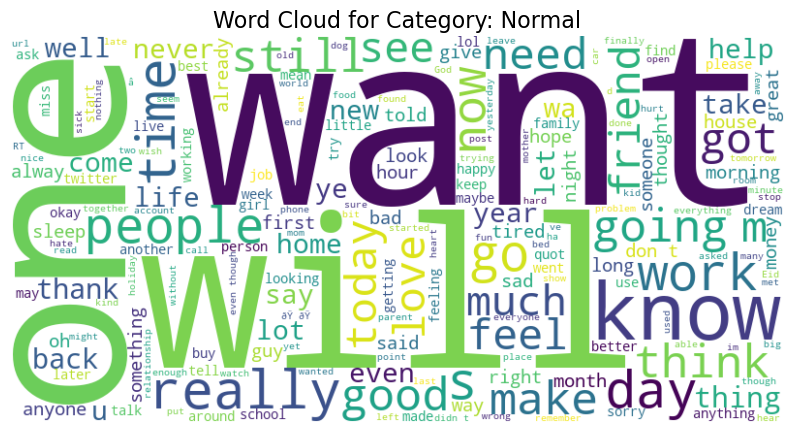

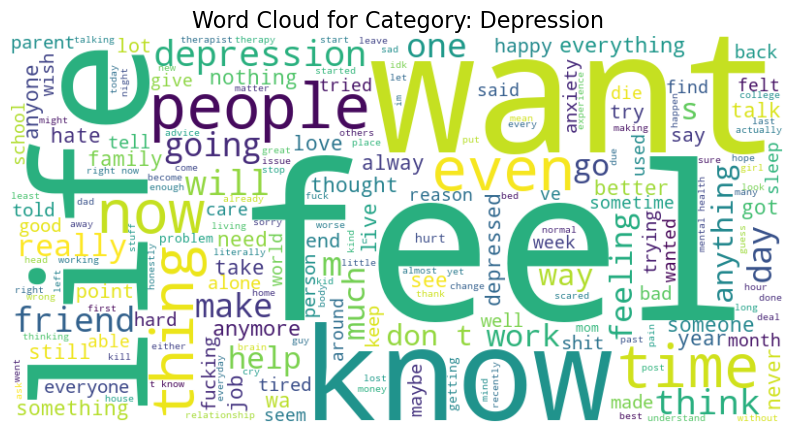

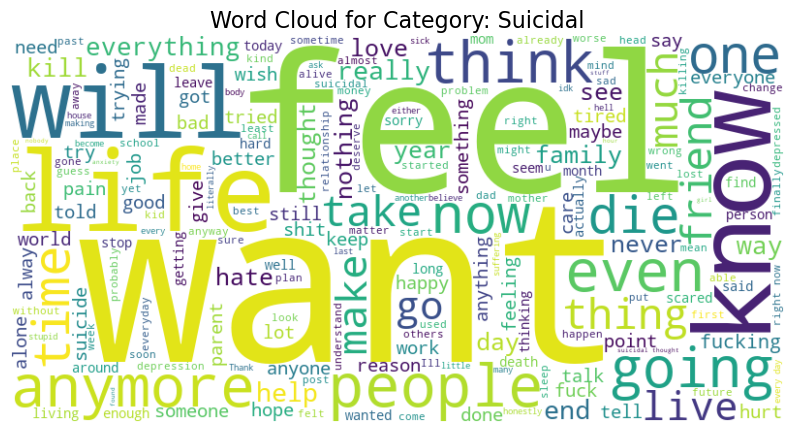

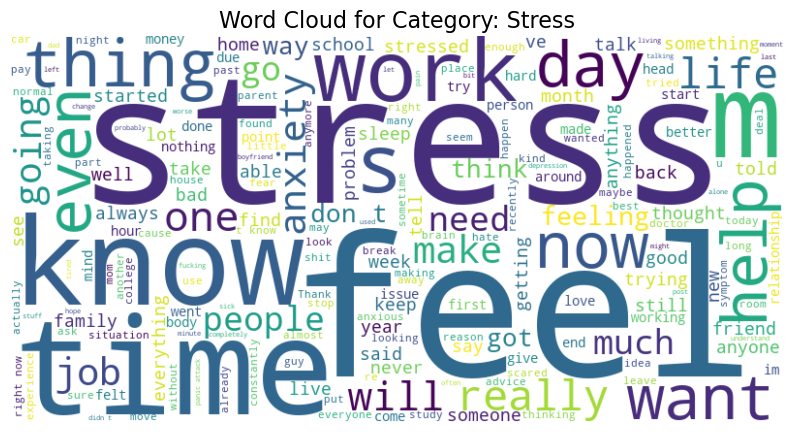

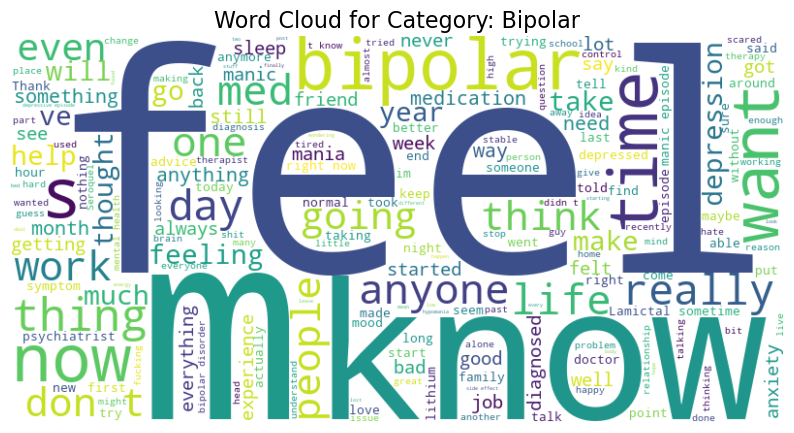

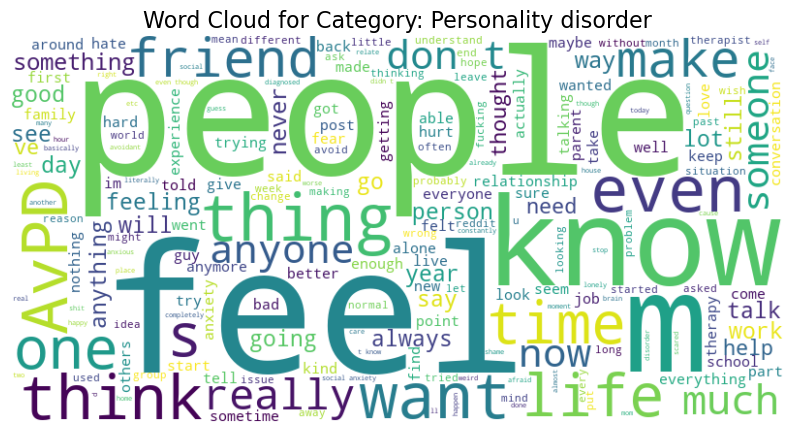

In [15]:
# Ensure the data is in the correct format
categories = data['status'].unique()  # Extract unique categories from the 'status' column

# Iterate over each category to create and display a word cloud
for category in categories:
    # Filter the statements for the current category
    category_texts = data[data['status'] == category]['statement'].values
    
    # Combine all texts into a single string
    combined_text = ' '.join(category_texts)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Category: {category}", fontsize=16)
    plt.show()


In [16]:
# Imports for main code

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
import torch
import plotly.graph_objects as go

# For Preprocessing and results
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
from sklearn.utils.class_weight import compute_class_weight

# For LDA and CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords

# For Different Classical ML methods used
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# For Different neural network methods used
from keras import models
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from scipy.sparse import hstack
from transformers import BertTokenizer, TFBertForSequenceClassification, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, recall_score



In [17]:
# Load dataset
dataset = pd.read_csv('mental_health_dataset.csv')

# Clean dataset
dataset = dataset.dropna(subset=['statement'])
dataset = dataset.drop(columns=['Unnamed: 0'])  # Drop unnecessary column

# Clean and normalize the target labels in the dataset
def normalize_labels(label):
    if isinstance(label, str):
        label = label.strip().lower()  # Convert to lowercase and strip spaces
        label = label.replace('-', '')  # Replace hyphens with underscores
        return label
    return label


# Apply normalization to the 'status' column
dataset['status'].apply(normalize_labels)

# Update the label mapping based on normalized values
label_mapping = {
    'Normal': 1,
    'Depression': 2,
    'Suicidal': 3,
    'Anxiety': 4,
    'Stress': 5,
    'Bipolar': 6,
    'Personality disorder': 7

}


# Map target labels to integers for the 7 sentiment classes
dataset['status'] = dataset['status'].map(label_mapping)

# Drop rows where labels are NaN after mapping
dataset = dataset.dropna(subset=['status'])

# Split the dataset

train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['status'])
X_train, y_train = train_data['statement'], train_data['status']
X_test, y_test = test_data['statement'], test_data['status']



In [18]:
# Preprocessing examples using spacy and NER, for show only to get a sense of what can be done
# This is not used later in methods, as I did not think it would be helpful and could harm predictiveness in this case
nlp = spacy.load("en_core_web_sm")

# Apply NER to some sample statements
for doc in nlp.pipe(X_train[:5]):
    print([(ent.text, ent.label_) for ent in doc.ents])
    # Tokenization
    tokens_spacy = [token.text for token in doc]
    # Lemmatization
    lemmas_spacy = [token.lemma_ for token in doc]

("Sample tokens (SpaCy):", tokens_spacy[:50])


[('Australian', 'NORP'), ('16 year old', 'DATE'), ('each night', 'TIME')]
[]
[('years', 'DATE'), ('the last 4 years', 'DATE'), ('four years', 'DATE'), ('a decade', 'DATE'), ('years', 'DATE'), ('today', 'DATE'), ('100k', 'PRODUCT'), ('years', 'DATE'), ('years', 'DATE')]
[('awwwwww', 'PERSON')]
[]


('Sample tokens (SpaCy):',
 ['I', 'am', 'done', 'with', 'life', 'goodbye', 'fuck', 'it'])

In [19]:
# LDA and Coherence

In [20]:
# Bag of Words vectorization
bow_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data, and transform the test data
X_train_bow = bow_vectorizer.fit_transform(X_train)  # Transform the training set
X_test_bow = bow_vectorizer.transform(X_test)        # Transform the test set


In [21]:
# Fit LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_train_lda = lda.fit_transform(X_train_bow)

# Display the topics with top words
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: ", [bow_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:  ['was', 'is', 'the', 'that', 'my', 'me', 'to', 'her', 'and', 'she']
Topic 1:  ['for', 'is', 'am', 'in', 'have', 'of', 'the', 'my', 'and', 'to']
Topic 2:  ['just', 'want', 'hate', 'sleep', 'up', 'tired', 'am', 'to', 'so', 'fucking']
Topic 3:  ['have', 'do', 'my', 'it', 'is', 'the', 'am', 'and', 'not', 'to']
Topic 4:  ['have', 'but', 'the', 'my', 'just', 'it', 'like', 'feel', 'to', 'and']
Topic 5:  ['they', 'it', 'just', 'want', 'am', 'me', 'and', 'do', 'not', 'to']
Topic 6:  ['for', 'in', 'your', 'are', 'is', 'of', 'and', 'to', 'the', 'you']
Topic 7:  ['that', 'in', 'of', 'me', 'he', 'the', 'was', 'to', 'my', 'and']
Topic 8:  ['me', 'take', 'my', 'wa', 'that', 'and', 'don', 'the', 'to', 'it']
Topic 9:  ['in', 'but', 'have', 'that', 'of', 'it', 'to', 'the', 'my', 'and']


In [22]:
# Preprocess the data
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    processed_texts = []
    for text in texts:
        tokens = text.lower().split()  # Tokenize and convert to lowercase
        tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
        processed_texts.append(tokens)
    return processed_texts

processed_statements = preprocess_text(X_train)

# Create Dictionary and Corpus
dictionary = Dictionary(processed_statements)
corpus = [dictionary.doc2bow(text) for text in processed_statements]


In [23]:
# Train LDA Model with 7 Topics
num_topics = 7
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10, alpha='auto', eta='auto')

# Evaluate the Topics (Coherence Score)
coherence_model = CoherenceModel(model=lda_model, texts=processed_statements, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

# Inspect Topics and Calculate Exclusivity
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {idx + 1}: {topic}")

# Assign Topics to Sentences
topic_assignments = []
for bow in corpus:
    topic_probs = lda_model.get_document_topics(bow)
    topic_assignments.append(max(topic_probs, key=lambda x: x[1])[0])  # Get the most probable topic

# Evaluate Exclusivity
# Exclusivity measures how distinct each topic's keywords are from others.
def calculate_exclusivity(lda_model, top_n=10):
    topics = lda_model.show_topics(formatted=False, num_words=top_n)
    exclusivity_scores = []
    for topic_words in topics:
        topic_word_set = set([word for word, _ in topic_words[1]])
        other_words = set().union(*[set([word for word, _ in t[1]]) for t in topics if t != topic_words])
        exclusivity = len(topic_word_set - other_words) / len(topic_word_set)
        exclusivity_scores.append(exclusivity)
    return exclusivity_scores

exclusivity_scores = calculate_exclusivity(lda_model)
print(f"Exclusivity Scores: {exclusivity_scores}")


Coherence Score: 0.46542131606777426
Topic 1: 0.045*"take" + 0.045*"anymore." + 0.045*"cannot" + 0.006*"rt" + 0.005*"beers" + 0.004*"price" + 0.004*"curse" + 0.004*"ur" + 0.003*"star" + 0.003*"donât"
Topic 2: 0.039*"i'm" + 0.018*"anxiety" + 0.013*"i've" + 0.009*"can't" + 0.007*"panic" + 0.006*"heart" + 0.006*"stress" + 0.006*"started" + 0.006*"doctor" + 0.005*"symptoms"
Topic 3: 0.039*"i’m" + 0.019*"don’t" + 0.015*"it’s" + 0.014*"i’ve" + 0.010*"diagnosed" + 0.009*"bipolar" + 0.008*"can’t" + 0.005*"you’re" + 0.005*"meds" + 0.005*"episode"
Topic 4: 0.019*"like" + 0.016*"feel" + 0.013*"want" + 0.011*"know" + 0.010*"get" + 0.009*"even" + 0.008*"would" + 0.008*"life" + 0.007*"really" + 0.007*"people"
Topic 5: 0.054*"im" + 0.026*"dont" + 0.017*"cant" + 0.011*"co" + 0.011*"ive" + 0.009*"http" + 0.008*"un" + 0.006*"perdedorsoy" + 0.005*"u" + 0.004*"de"
Topic 6: 0.017*"wa" + 0.015*"got" + 0.012*"year" + 0.011*"said" + 0.010*"told" + 0.009*"friend" + 0.009*"school" + 0.008*"went" + 0.007*"back

In [24]:
# Bag of Words + Logistic Regression

In [25]:
# Train Logistic Regression using Bag of Words
bow_classifier = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
bow_classifier.fit(X_train_bow, y_train)  # Use X_train_bow instead of X_train
y_pred_bow = bow_classifier.predict(X_test_bow)  # Predict using X_test_bow

# Check predictions
print(y_pred_bow)

/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[3 3 2 ... 4 1 1]


/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


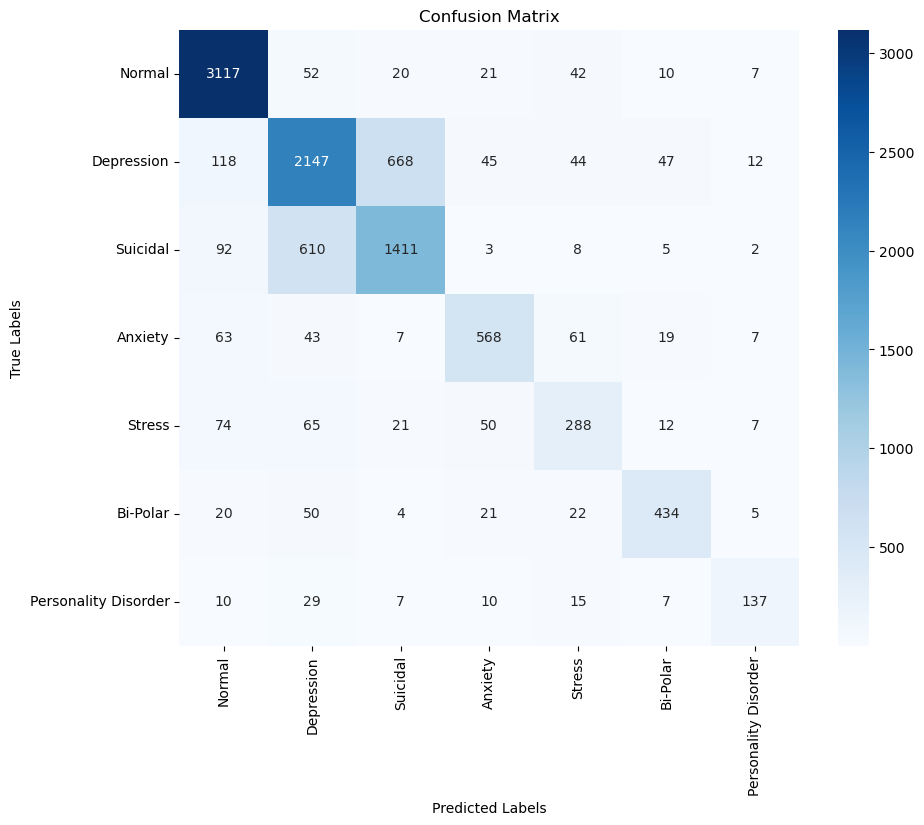

Classification Report:
                      precision    recall  f1-score   support

              Normal       0.89      0.95      0.92      3269
          Depression       0.72      0.70      0.71      3081
            Suicidal       0.66      0.66      0.66      2131
             Anxiety       0.79      0.74      0.76       768
              Stress       0.60      0.56      0.58       517
             Bipolar       0.81      0.78      0.80       556
Personality Disorder       0.77      0.64      0.70       215

            accuracy                           0.77     10537
           macro avg       0.75      0.72      0.73     10537
        weighted avg       0.77      0.77      0.77     10537



In [26]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bow)

# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bi-Polar', 'Personality Disorder'],
            yticklabels=['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bi-Polar', 'Personality Disorder'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_bow, target_names=['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bipolar', 'Personality Disorder']))


In [27]:
# TF-IDF + Logistic Regression

/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


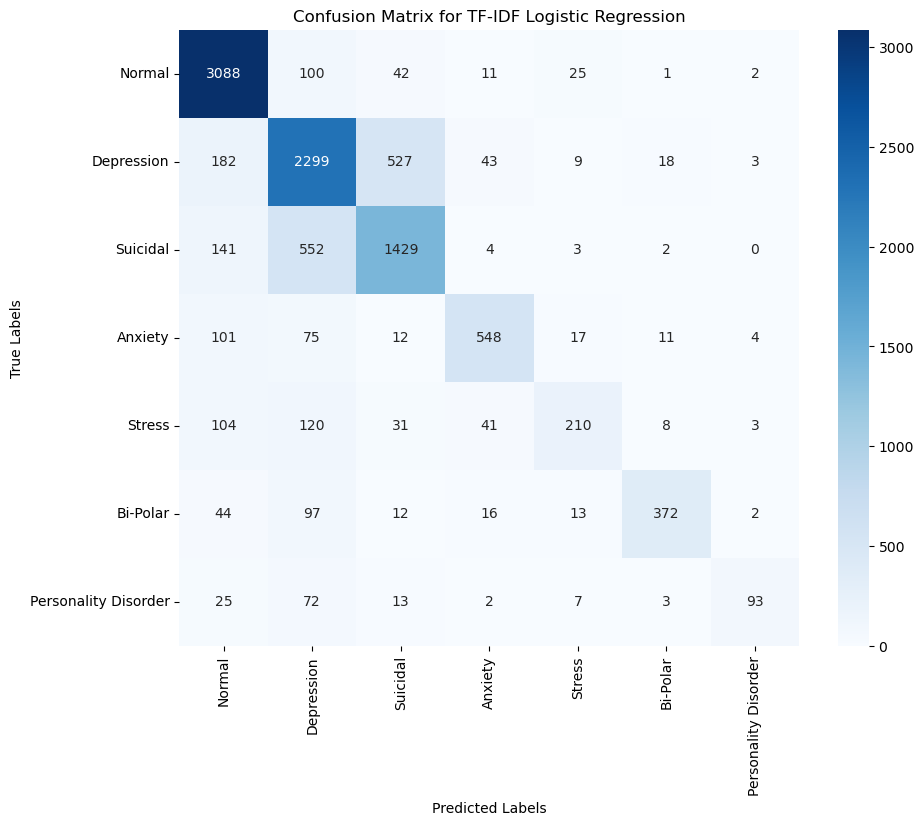

Classification Report for TF-IDF Logistic Regression:
                      precision    recall  f1-score   support

              Normal       0.84      0.94      0.89      3269
          Depression       0.69      0.75      0.72      3081
            Suicidal       0.69      0.67      0.68      2131
             Anxiety       0.82      0.71      0.76       768
              Stress       0.74      0.41      0.52       517
            Bi-Polar       0.90      0.67      0.77       556
Personality Disorder       0.87      0.43      0.58       215

            accuracy                           0.76     10537
           macro avg       0.79      0.65      0.70     10537
        weighted avg       0.76      0.76      0.76     10537



In [28]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Logistic Regression model
tfidf_classifier = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
tfidf_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_tfidf = tfidf_classifier.predict(X_test_tfidf)

# Evaluate the model using Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tfidf)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bi-Polar', 'Personality Disorder'],
            yticklabels=['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bi-Polar', 'Personality Disorder'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix for TF-IDF Logistic Regression')
plt.show()

# Print the classification report
print("Classification Report for TF-IDF Logistic Regression:")
print(classification_report(y_test, y_pred_tfidf, target_names=['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bi-Polar', 'Personality Disorder']))


In [29]:
# TF-IDF Vectorizer with n-grams
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression Model
tfidf_classifier = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
tfidf_classifier.fit(X_train_tfidf, y_train)

# Predict and Evaluate
y_pred_tfidf = tfidf_classifier.predict(X_test_tfidf)
print("Classification Report with TF-IDF and n-grams:")
print(classification_report(y_test, y_pred_tfidf, target_names=[
    'Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bipolar', 'Personality Disorder'
]))


/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report with TF-IDF and n-grams:
                      precision    recall  f1-score   support

              Normal       0.84      0.95      0.89      3269
          Depression       0.69      0.74      0.71      3081
            Suicidal       0.69      0.66      0.67      2131
             Anxiety       0.83      0.73      0.77       768
              Stress       0.73      0.40      0.52       517
             Bipolar       0.93      0.67      0.78       556
Personality Disorder       0.85      0.42      0.56       215

            accuracy                           0.76     10537
           macro avg       0.79      0.65      0.70     10537
        weighted avg       0.76      0.76      0.76     10537



In [30]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)
y_pred_nb = nb.predict(X_test_bow)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes:
               precision    recall  f1-score   support

           1       0.88      0.81      0.84      3269
           2       0.66      0.54      0.59      3081
           3       0.62      0.79      0.69      2131
           4       0.66      0.71      0.68       768
           5       0.55      0.48      0.51       517
           6       0.64      0.74      0.69       556
           7       0.46      0.71      0.56       215

    accuracy                           0.70     10537
   macro avg       0.64      0.68      0.65     10537
weighted avg       0.71      0.70      0.70     10537



In [31]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_bow, y_train)
y_pred_knn = nb.predict(X_test_bow)
print("KNN:\n", classification_report(y_test, y_pred_knn))


KNN:
               precision    recall  f1-score   support

           1       0.88      0.81      0.84      3269
           2       0.66      0.54      0.59      3081
           3       0.62      0.79      0.69      2131
           4       0.66      0.71      0.68       768
           5       0.55      0.48      0.51       517
           6       0.64      0.74      0.69       556
           7       0.46      0.71      0.56       215

    accuracy                           0.70     10537
   macro avg       0.64      0.68      0.65     10537
weighted avg       0.71      0.70      0.70     10537



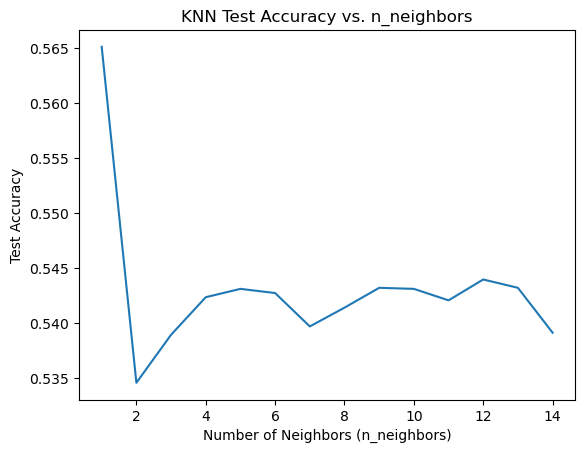

In [32]:
# Tune the 'n_neighbors' parameter
neighbors_range = range(1, 15)
accuracy_knn_tuned = []

for n_neighbors in neighbors_range:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train_bow, y_train)
    y_pred_knn_tuned = knn_model.predict(X_test_bow)
    accuracy_knn_tuned.append(accuracy_score(y_test, y_pred_knn_tuned))

# Plot the results
plt.plot(neighbors_range, accuracy_knn_tuned)
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Test Accuracy')
plt.title('KNN Test Accuracy vs. n_neighbors')
plt.show()

In [33]:
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train_bow, y_train)
y_pred_svm = svm.predict(X_test_bow)
print("SVM:\n", classification_report(y_test, y_pred_svm))

# Note: Parameter Search not used as it takes 3+ hours to run

# Tune the 'kernel' and 'C' parameters
#kernels = ['linear', 'poly']
#C_values = [0.1, 1, 10]
#best_accuracy_svm = 0
#best_model_svm = None

#for kernel in kernels:
#    for C in C_values:
#        svm_model = SVC(kernel=kernel, C=C)
#        svm_model.fit(X_train_bow, y_train)
#        y_pred_svm = svm_model.predict(X_test_bow)
#        accuracy_svm = accuracy_score(y_test, y_pred_svm)
#        
#        if accuracy_svm > best_accuracy_svm:
#            best_accuracy_svm = accuracy_svm
#            best_model_svm = svm_model
#            best_kernel = kernel
#            best_C = C

#print(f"Best SVM Model - Kernel: {best_kernel}, C: {best_C}, Accuracy: {best_accuracy_svm}")

SVM:
               precision    recall  f1-score   support

           1       0.89      0.95      0.92      3269
           2       0.69      0.69      0.69      3081
           3       0.66      0.65      0.65      2131
           4       0.79      0.74      0.76       768
           5       0.56      0.55      0.55       517
           6       0.79      0.72      0.75       556
           7       0.68      0.59      0.63       215

    accuracy                           0.76     10537
   macro avg       0.72      0.70      0.71     10537
weighted avg       0.75      0.76      0.75     10537



In [34]:
# Random Forest
rf= RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=None,     # No maximum depth
    max_features='sqrt',  # square root of number of features for classification
    random_state=42     # Ensures reproducibility
)
rf.fit(X_train_bow, y_train)
y_pred_rf = rf.predict(X_test_bow)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           1       0.83      0.94      0.88      3269
           2       0.55      0.81      0.66      3081
           3       0.70      0.49      0.58      2131
           4       0.90      0.46      0.61       768
           5       0.94      0.23      0.37       517
           6       0.98      0.44      0.61       556
           7       1.00      0.30      0.46       215

    accuracy                           0.70     10537
   macro avg       0.84      0.52      0.59     10537
weighted avg       0.74      0.70      0.69     10537



In [35]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bow, y_train)
y_pred_dt = dt.predict(X_test_bow)
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree:
               precision    recall  f1-score   support

           1       0.86      0.87      0.87      3269
           2       0.62      0.63      0.62      3081
           3       0.55      0.55      0.55      2131
           4       0.59      0.57      0.58       768
           5       0.46      0.46      0.46       517
           6       0.63      0.59      0.61       556
           7       0.50      0.52      0.51       215

    accuracy                           0.67     10537
   macro avg       0.60      0.60      0.60     10537
weighted avg       0.67      0.67      0.67     10537



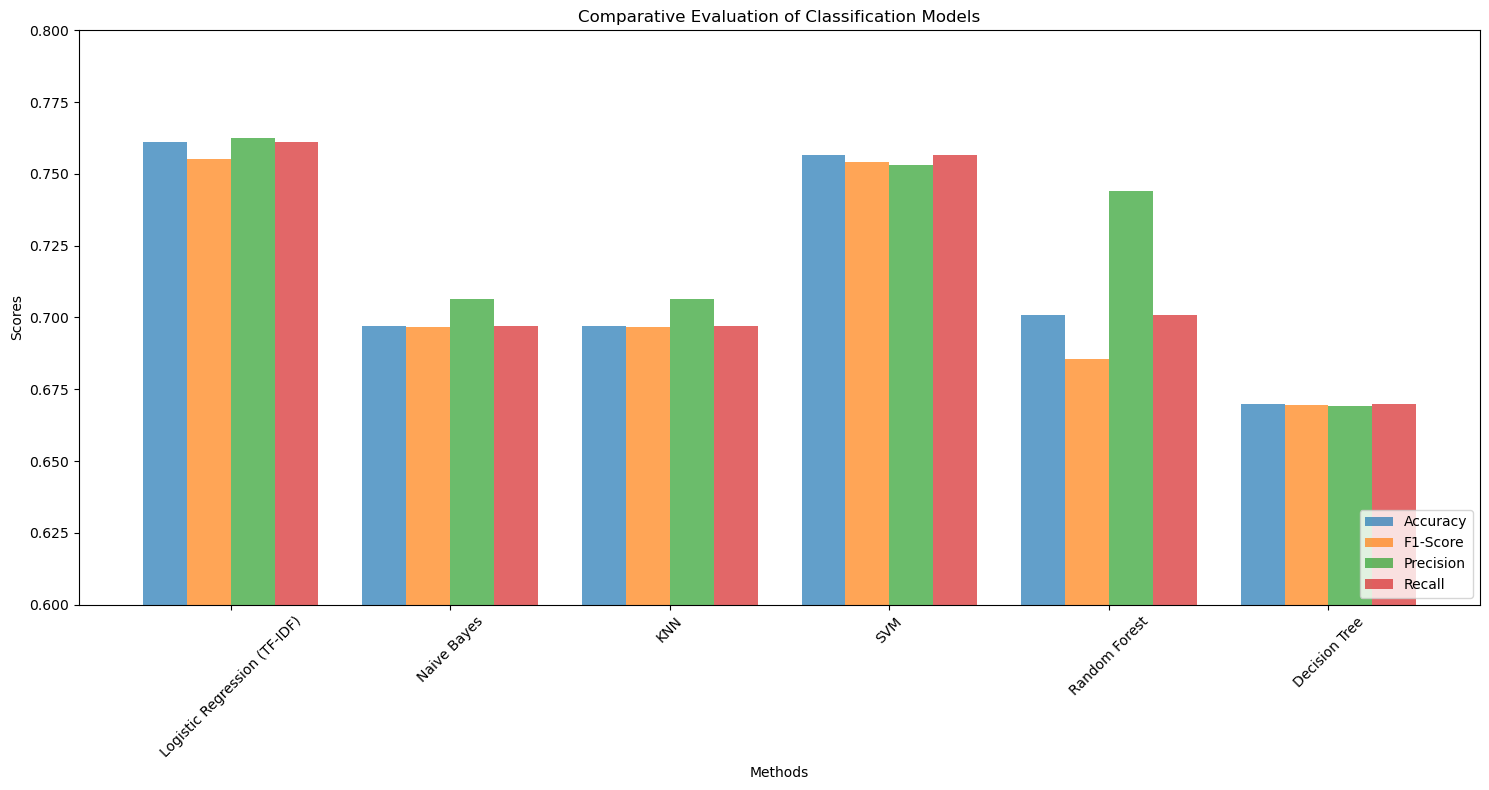

In [36]:
# Define a function to extract metrics from classification reports
def extract_metrics(y_test, y_pred, method_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = {
        "method": method_name,
        "accuracy": report["accuracy"],  # Extract accuracy
        "f1_score": report["weighted avg"]["f1-score"],  # Extract weighted F1-score
        "precision": report["weighted avg"]["precision"],  # Extract weighted precision
        "recall": report["weighted avg"]["recall"]  # Extract weighted recall
    }
    return metrics

# Initialize a list to store metrics for all methods
metrics_list = []

# Assuming y_preds from the earlier models
# Example: Logistic Regression
metrics_list.append(extract_metrics(y_test, y_pred_tfidf, "Logistic Regression (TF-IDF)"))

# Naive Bayes
metrics_list.append(extract_metrics(y_test, y_pred_nb, "Naive Bayes"))

# KNN
metrics_list.append(extract_metrics(y_test, y_pred_knn, "KNN"))

# SVM
metrics_list.append(extract_metrics(y_test, y_pred_svm, "SVM"))

# Random Forest
metrics_list.append(extract_metrics(y_test, y_pred_rf, "Random Forest"))

# Decision Tree
metrics_list.append(extract_metrics(y_test, y_pred_dt, "Decision Tree"))

# Create lists for each metric
methods = [m["method"] for m in metrics_list]
accuracy = [m["accuracy"] for m in metrics_list]
f1_scores = [m["f1_score"] for m in metrics_list]
precision = [m["precision"] for m in metrics_list]
recall = [m["recall"] for m in metrics_list]

# Generate comparative bar chart
x = np.arange(len(methods))
width = 0.2

plt.figure(figsize=(15, 8))

# Plot Accuracy
plt.bar(x - width*1.5, accuracy, width, label='Accuracy', alpha=0.7)

# Plot F1-Score
plt.bar(x - width/2, f1_scores, width, label='F1-Score', alpha=0.7)

# Plot Precision
plt.bar(x + width/2, precision, width, label='Precision', alpha=0.7)

# Plot Recall
plt.bar(x + width*1.5, recall, width, label='Recall', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Methods')
plt.ylabel('Scores')
plt.title('Comparative Evaluation of Classification Models')
plt.xticks(x, methods, rotation=45)
plt.ylim(0.6, 0.8)  # Adjust y-axis to show the range 0.7 to 0.8
plt.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()


In [37]:
# Neural Network Classification and Predictions

In [38]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)  # Match the input_shape=(10000,)
X_train_vec = vectorizer.fit_transform(X_train).toarray()  # Convert to dense array
X_test_vec = vectorizer.transform(X_test).toarray()


In [39]:
# Adjust labels to start from 0
y_train = y_train - 1  # Subtract 1 from each class label
y_test_adjusted = y_test - 1

# One-hot encode the adjusted labels
y_train_enc = to_categorical(y_train, num_classes=7)  # Ensure 7 classes
y_test_enc = to_categorical(y_test_adjusted, num_classes=7)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))


In [40]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))  # Match input shape to vectorized data
model.add(layers.Dropout(0.5))  # Add dropout to prevent overfitting
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(y_train.unique()), activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train_vec, y_train_enc, class_weight=class_weights_dict, epochs=20, batch_size=512, validation_data=(X_test_vec, y_test_enc))


Epoch 1/20


2024-12-12 19:34:21.716306: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


83/83 [==============================] - 2s 17ms/step - loss: 1.5874 - accuracy: 0.5113 - val_loss: 1.0162 - val_accuracy: 0.6902
Epoch 2/20
83/83 [==============================] - 1s 12ms/step - loss: 0.9975 - accuracy: 0.6601 - val_loss: 0.7851 - val_accuracy: 0.7136
Epoch 3/20
83/83 [==============================] - 1s 11ms/step - loss: 0.7441 - accuracy: 0.7160 - val_loss: 0.7164 - val_accuracy: 0.7333
Epoch 4/20
83/83 [==============================] - 1s 12ms/step - loss: 0.6123 - accuracy: 0.7518 - val_loss: 0.6643 - val_accuracy: 0.7536
Epoch 5/20
83/83 [==============================] - 1s 11ms/step - loss: 0.5276 - accuracy: 0.7772 - val_loss: 0.6615 - val_accuracy: 0.7582
Epoch 6/20
83/83 [==============================] - 1s 11ms/step - loss: 0.4613 - accuracy: 0.7991 - val_loss: 0.6372 - val_accuracy: 0.7671
Epoch 7/20
83/83 [==============================] - 1s 11ms/step - loss: 0.4125 - accuracy: 0.8157 - val_loss: 0.6425 - val_accuracy: 0.7619
Epoch 8/20
83/83 [======

In [41]:
# Get feature importance from the weights of the Dense layers
tfidf_feature_names = vectorizer.get_feature_names_out()

# Extract weights from the first Dense layer (if applicable)
weights = model.layers[0].get_weights()[0]  # Shape: (10000, 128)

# Sum up the absolute values of the weights for each word
word_importance = weights.sum(axis=1)

# Get top 20 most important words
top_indices = word_importance.argsort()[-20:][::-1]  # Indices of the top predictors
top_words = [tfidf_feature_names[i] for i in top_indices]

print("Top 20 Predictors (Words):")
for i, word in enumerate(top_words, start=1):
    print(f"{i}. {word}")


Top 20 Predictors (Words):
1. theekween
2. mizzzidc
3. thelmasherbs
4. jyp
5. restless
6. pdoc
7. scaring
8. ðÿ
9. dreamies
10. avpd
11. sneaker
12. pression
13. glad
14. quot
15. depakote
16. bp2
17. nearby
18. tmi
19. pregnant
20. 80


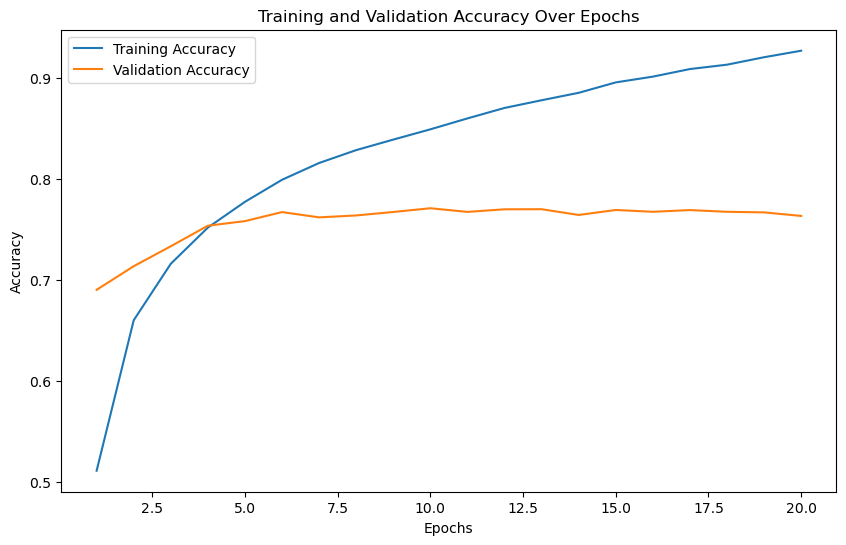

Final Validation Accuracy: 0.76


In [42]:
# Extract training and validation accuracy from history
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
epochs = range(1, len(training_acc) + 1)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_acc, label='Training Accuracy')
plt.plot(epochs, validation_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print final validation accuracy
final_val_acc = validation_acc[-1]
print(f"Final Validation Accuracy: {final_val_acc:.2f}")


In [43]:
# Predict on validation set
y_pred = model.predict(X_test_vec)
y_pred_labels = y_pred.argmax(axis=1)  # Convert probabilities to class labels

y_test = y_test - 1  # Adjust to start from 0
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=[
    'Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bipolar', 'Personality disorder'
]))


330/330 [==============================] - 0s 667us/step
Classification Report:
                      precision    recall  f1-score   support

              Normal       0.92      0.90      0.91      3269
          Depression       0.76      0.64      0.70      3081
            Suicidal       0.64      0.76      0.70      2131
             Anxiety       0.77      0.79      0.78       768
              Stress       0.51      0.59      0.55       517
             Bipolar       0.78      0.82      0.80       556
Personality disorder       0.56      0.67      0.61       215

            accuracy                           0.76     10537
           macro avg       0.71      0.74      0.72     10537
        weighted avg       0.77      0.76      0.76     10537



In [44]:
# NER enhanced neural nets

In [45]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Extract named entities from text
def extract_named_entities(text):
    doc = nlp(text)
    return [ent.label_ for ent in doc.ents]

# Apply NER on training and test sets
train_entities = [extract_named_entities(text) for text in X_train]
test_entities = [extract_named_entities(text) for text in X_test]

# Create a unique set of all entities across train and test sets
all_entities = set(entity for entities in train_entities + test_entities for entity in entities)
entity_map = {entity: i for i, entity in enumerate(all_entities)}


In [46]:
# Convert entity list to binary features
def entities_to_features(entity_list, entity_map):
    features = np.zeros((len(entity_list), len(entity_map)))
    for i, entities in enumerate(entity_list):
        for entity in entities:
            if entity in entity_map:
                features[i, entity_map[entity]] = 1
    return features

# Convert NER features to binary format
X_train_ner = entities_to_features(train_entities, entity_map)
X_test_ner = entities_to_features(test_entities, entity_map)


In [47]:
# Combine TF-IDF and NER features
X_train_combined = hstack([X_train_tfidf, X_train_ner])  # X_train_tfidf is from your TF-IDF vectorizer
X_test_combined = hstack([X_test_tfidf, X_test_ner])


In [48]:
# Convert sparse matrices to dense arrays
X_train_combined_dense = X_train_combined.toarray()
X_test_combined_dense = X_test_combined.toarray()


In [49]:
# Convert labels to NumPy arrays
y_train_array = y_train.values
y_test_array = y_test.values

In [50]:
# Define the neural network architecture
enhanced_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_combined_dense.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Ensure correct number of output classes
])

# Compile the model
enhanced_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [51]:
# Accruacy measure was throwing type errors that I could not solve, manually defining loss metric solved issue
def sparse_categorical_accuracy(y_true, y_pred):
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

enhanced_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[sparse_categorical_accuracy]
)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Train the model
history = enhanced_model.fit(
    X_train_combined_dense, y_train,
    epochs=10, batch_size=64,
    class_weight=class_weights_dict,
    validation_data=(X_test_combined_dense, y_test)
)


Epoch 1/10
659/659 [==============================] - 2s 3ms/step - loss: 1.2398 - sparse_categorical_accuracy: 0.5654 - val_loss: 0.7713 - val_sparse_categorical_accuracy: 0.7271
Epoch 2/10
659/659 [==============================] - 2s 3ms/step - loss: 0.6567 - sparse_categorical_accuracy: 0.7429 - val_loss: 0.7670 - val_sparse_categorical_accuracy: 0.7299
Epoch 3/10
659/659 [==============================] - 2s 3ms/step - loss: 0.4306 - sparse_categorical_accuracy: 0.8078 - val_loss: 0.7021 - val_sparse_categorical_accuracy: 0.7579
Epoch 4/10
659/659 [==============================] - 2s 3ms/step - loss: 0.3095 - sparse_categorical_accuracy: 0.8470 - val_loss: 0.7511 - val_sparse_categorical_accuracy: 0.7553
Epoch 5/10
659/659 [==============================] - 2s 3ms/step - loss: 0.2348 - sparse_categorical_accuracy: 0.8791 - val_loss: 0.8053 - val_sparse_categorical_accuracy: 0.7585
Epoch 6/10
659/659 [==============================] - 2s 3ms/step - loss: 0.1854 - sparse_categorica

In [52]:
# Predict on test data
y_pred = enhanced_model.predict(X_test_combined_dense)
y_pred_labels = y_pred.argmax(axis=1)

# Print classification report
print("Classification Report with NER Features:")
print(classification_report(y_test, y_pred_labels, target_names=[
    'Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bipolar', 'Personality Disorder'
]))


330/330 [==============================] - 0s 735us/step
Classification Report with NER Features:
                      precision    recall  f1-score   support

              Normal       0.88      0.90      0.89      3269
          Depression       0.71      0.67      0.69      3081
            Suicidal       0.65      0.66      0.65      2131
             Anxiety       0.79      0.77      0.78       768
              Stress       0.51      0.56      0.54       517
             Bipolar       0.78      0.78      0.78       556
Personality Disorder       0.60      0.65      0.62       215

            accuracy                           0.75     10537
           macro avg       0.70      0.71      0.71     10537
        weighted avg       0.75      0.75      0.75     10537



In [53]:
# Bert Application

In [54]:
# Define the dataset
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

# Load data
data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize data
train_encodings = tokenizer(list(data['text']), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_data['text']), truncation=True, padding=True, max_length=128)

# Create dataset
train_dataset = TextDataset(train_encodings, list(data['label']))
test_dataset = TextDataset(test_encodings, list(test_data['label']))


In [55]:
# Load pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=7)

# Define metrics for evaluation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    recall = recall_score(labels, preds, average='macro')  # Macro recall for multi-class
    return {"accuracy": acc, "recall": recall}

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',           # Output directory
    num_train_epochs=3,               # Number of training epochs
    per_device_train_batch_size=16,   # Batch size for training
    per_device_eval_batch_size=16,    # Batch size for evaluation
    warmup_steps=500,                 # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,                # Strength of weight decay
    logging_dir='./logs',             # Directory for storing logs
    logging_steps=10,                 # Log every 10 steps
    evaluation_strategy="epoch",      # Evaluate every epoch
    save_strategy="epoch",            # Save every epoch
    load_best_model_at_end=True,      # Load the best model at the end of training
    save_total_limit=2                # Limit the total number of saved models
)

# Initialize Trainer
trainer = Trainer(
    model=model,                        # The pre-trained BERT model
    args=training_args,                 # Training arguments
    train_dataset=train_dataset,        # Training dataset
    eval_dataset=test_dataset,          # Evaluation dataset
    tokenizer=tokenizer,                # Tokenizer
    compute_metrics=compute_metrics     # Evaluation metrics
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_71603/2391208128.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [56]:
# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

# Print results
print(f"Accuracy: {results['eval_accuracy']:.4f}")
print(f"Recall: {results['eval_recall']:.4f}")


Accuracy: 0.8319
Recall: 0.7925


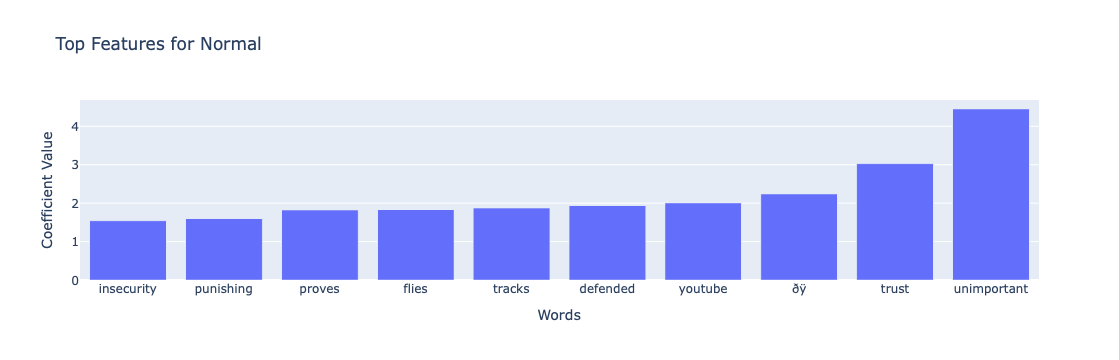

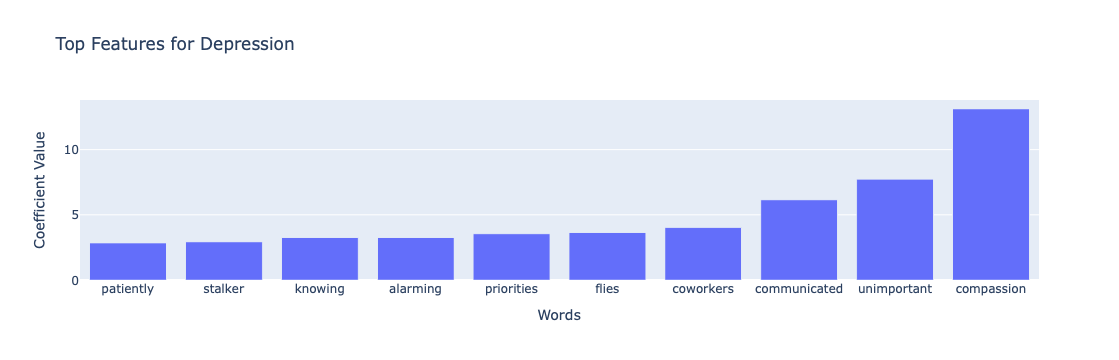

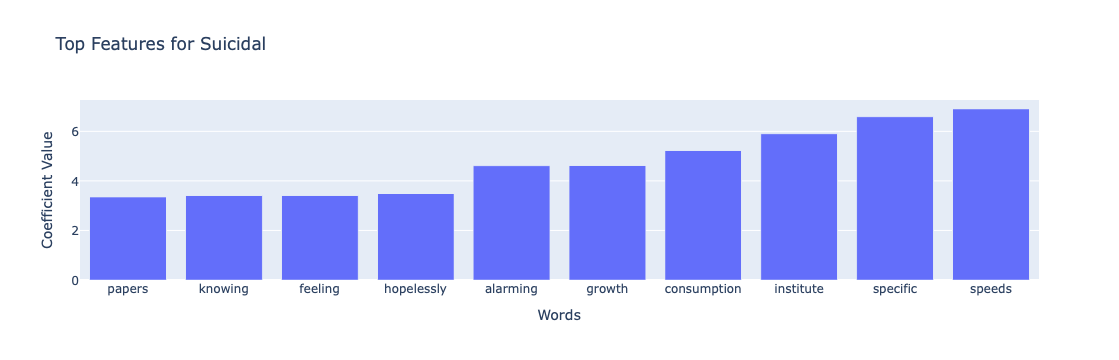

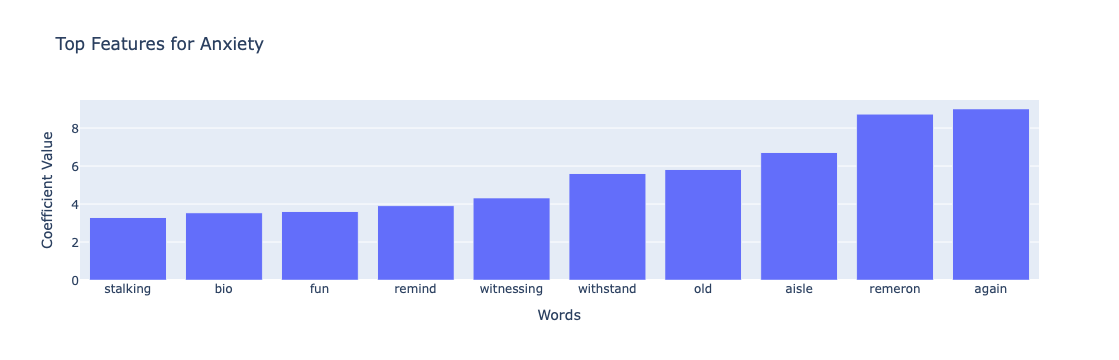

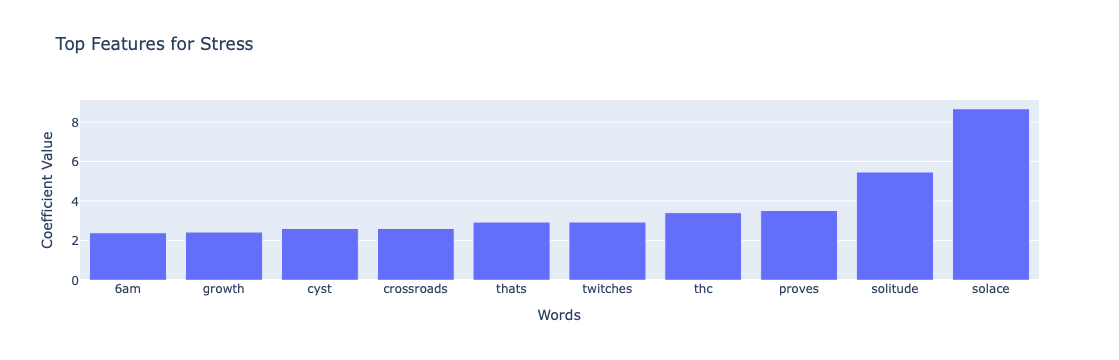

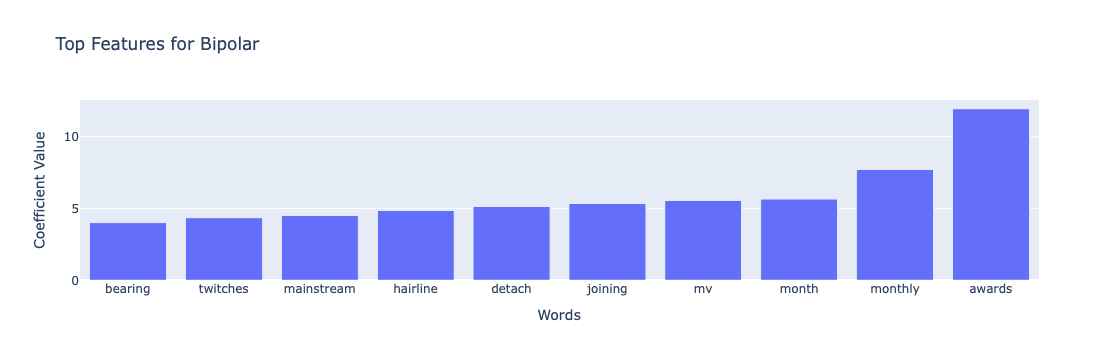

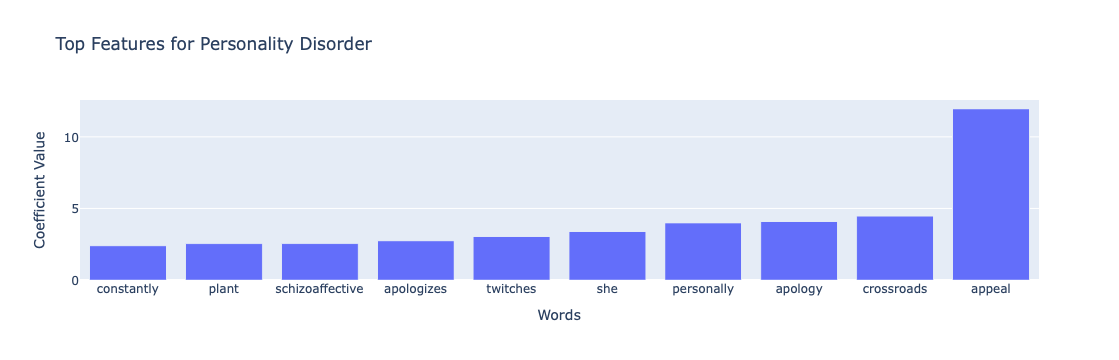

In [57]:
# Appendix - Top Features for each status 
# I purposefully left this until the end to improve models a priori,
# Without knowledge that could be "fitting to test set"

# Extract feature names
feature_names = vectorizer.get_feature_names_out()

# Extract the coefficients for each class
coefs = tfidf_classifier.coef_

# Loop through each class and plot top features
for i, category in enumerate(['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Stress', 'Bipolar', 'Personality Disorder']):
    # Get the indices of the top 10 features for the current category
    top_features = np.argsort(coefs[i])[-10:]
    
    # Get the corresponding feature names and scores
    top_words = [feature_names[j] for j in top_features]
    top_scores = coefs[i][top_features]
    
    # Plot the top features for the current category
    fig = go.Figure([go.Bar(x=top_words, y=top_scores)])
    fig.update_layout(title=f"Top Features for {category}",
                      xaxis_title="Words",
                      yaxis_title="Coefficient Value")
    fig.show()
